In [150]:
from standardInclude import *

In [151]:
f = r.TFile("./nearline_NoSyncPulseCorrection_run30278_00496.root")
f2 = r.TFile("./nearline_WithSyncPulseCorrection_run30278_00496.root")
f3 = r.TFile("./gm2offline_full_OOF.root")

In [152]:
t = f.Get("nearlineHistTree/eventTree")
t2 = f2.Get("nearlineHistTree/eventTree")
t3 = f3.Get("clusterTree/clusters")

t0 = f2.Get("t0Analyzer/t0Tree")
t0.Print()

******************************************************************************
*Tree    :t0Tree    : t0Tree                                                 *
*Entries :      123 : Total =        29917445 bytes  File  Size =    8773136 *
*        :          : Tree compression factor =   3.41                       *
******************************************************************************
*Br    0 :tracetubeA : vector<int>                                           *
*Entries :      123 : Total  Size=    4935704 bytes  File Size  =    1094620 *
*Baskets :      123 : Basket Size=      32000 bytes  Compression=   4.51     *
*............................................................................*
*Br    1 :sampleNums : vector<unsigned int>                                  *
*Entries :      123 : Total  Size=    4936196 bytes  File Size  =    1729749 *
*Baskets :      123 : Basket Size=      32000 bytes  Compression=   2.85     *
*...................................................

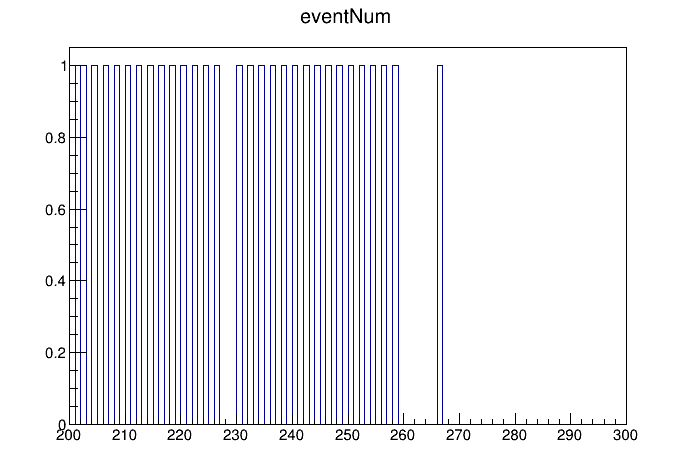

In [153]:
c = r.TCanvas()
t0.Draw("eventNum>>hist(100,200,300)")
c.Draw()

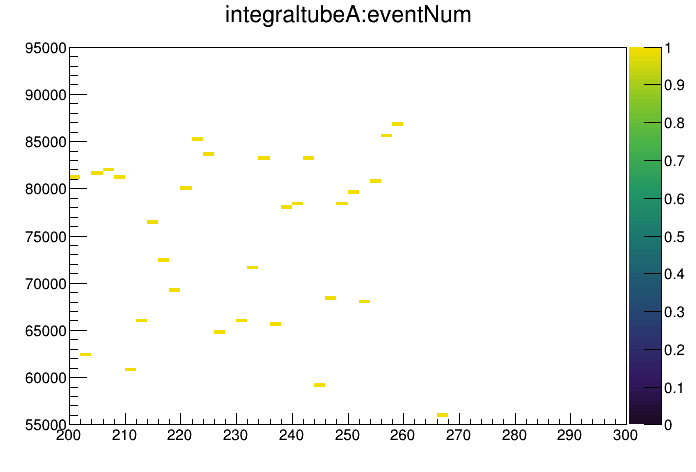

In [154]:
c = r.TCanvas()
t0.Draw("integraltubeA:eventNum>>hist(50,200,300,100,55000,95000)","","colz")
c.Draw()

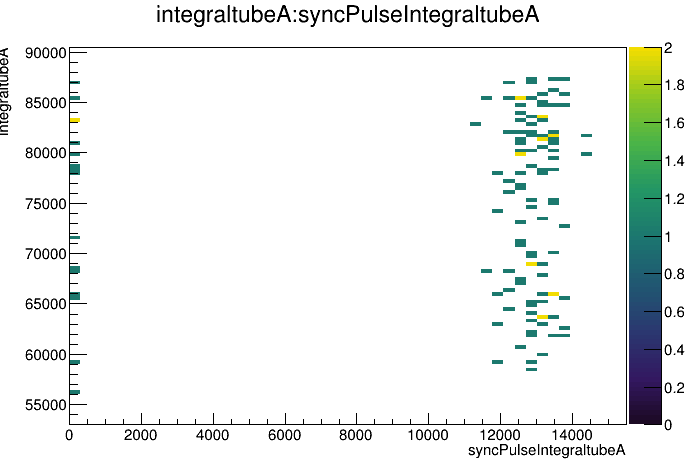

In [155]:
c = r.TCanvas()
t0.Draw("integraltubeA:syncPulseIntegraltubeA","","colz")
c.Draw()

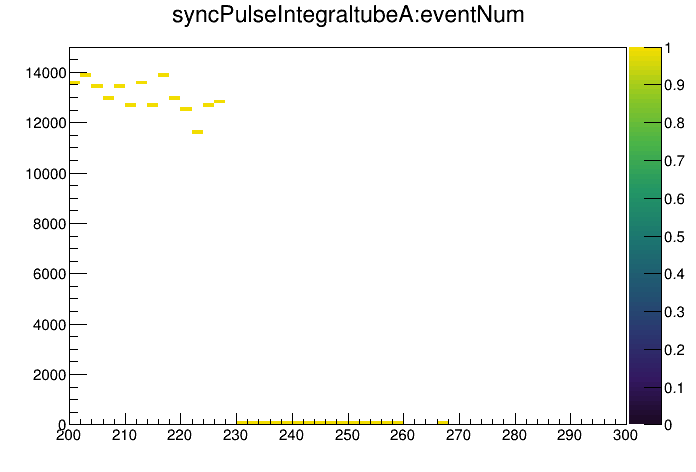

In [156]:
c = r.TCanvas()
t0.Draw("syncPulseIntegraltubeA:eventNum>>hist(50,200,300,100,0,15000)","","colz")
c.Draw()

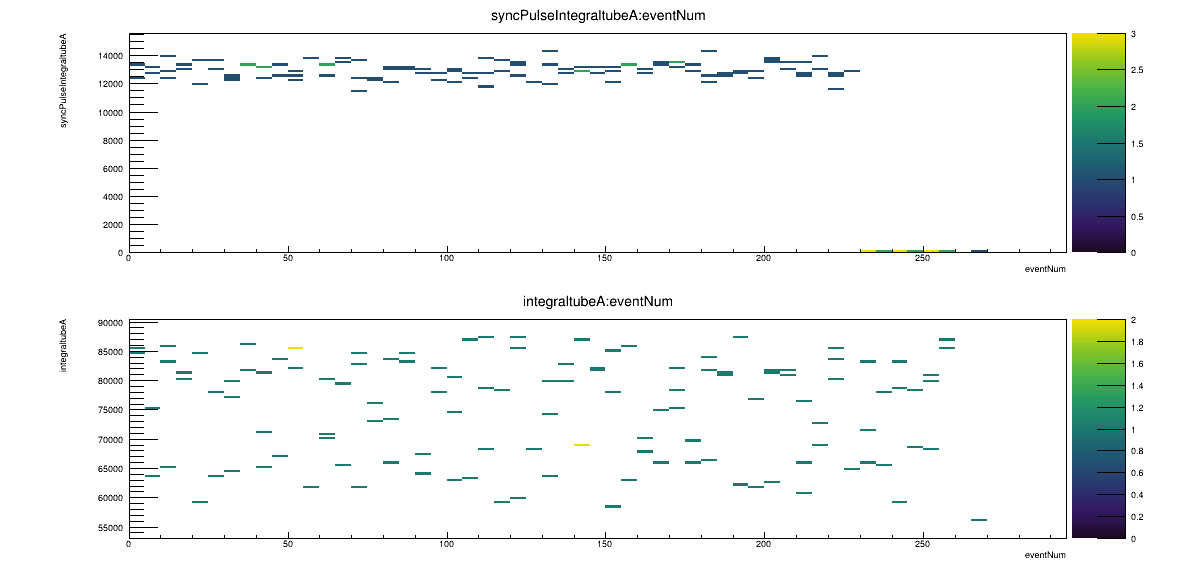

In [157]:
c = r.TCanvas("c","c",1200,600)
c.Divide(1,2)
c.cd(1)
t0.Draw("syncPulseIntegraltubeA:eventNum","","colz")
c.cd(2)
t0.Draw("integraltubeA:eventNum","","colz")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


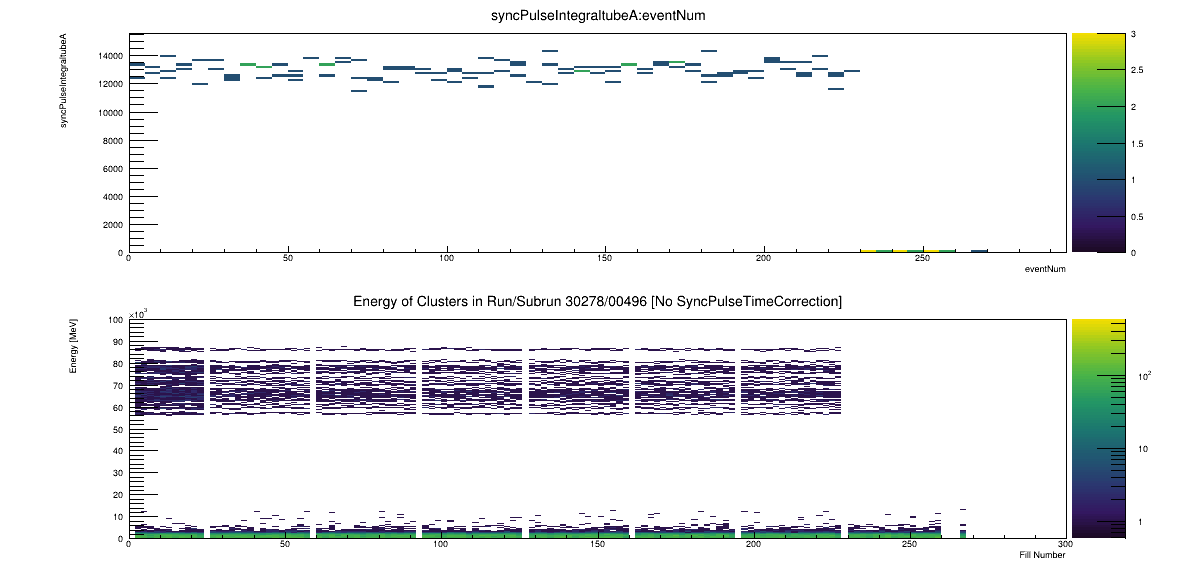

In [158]:
c = r.TCanvas("c","c",1200,600)
c.Divide(1,2)
c.cd(1)
t0.Draw("syncPulseIntegraltubeA:eventNum","","colz")
c.cd(2)
h = r.TH2D("h","Energy of Clusters in Run/Subrun 30278/00496 [No SyncPulseTimeCorrection]; Fill Number; Energy [MeV]",
           150,0,300,
           1000,0,100000)
t.Draw("energy:eventNum>>h","","colz")
r.gPad.SetLogz()
c.Draw()

In [159]:
t4 = f.Get("nearlineHistTree/eventTree")
t4.AddFriend("t0Analyzer/t0Tree")

<ROOT.TFriendElement object ("t0Analyzer/t0Tree") at 0x7ffff2f18100>

In [160]:
t4.Print()

******************************************************************************
*Tree    :eventTree : eventTree                                              *
*Entries :      123 : Total =        11210140 bytes  File  Size =    8357530 *
*        :          : Tree compression factor =   1.34                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :      123 : Total  Size=       1059 bytes  File Size  =        104 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   5.48     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :      123 : Total  Size=       1074 bytes  File Size  =        108 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   5.31     *
*...................................................

127137.0 127395.0


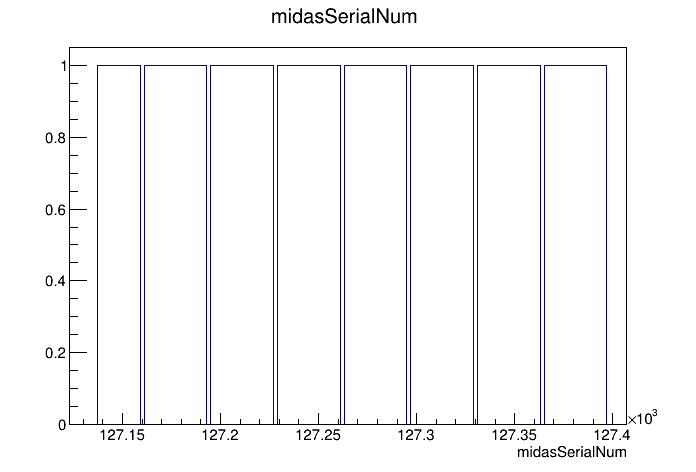

In [170]:
c = r.TCanvas()
ding = t4.Draw("midasSerialNum","","")
v1 = [t4.GetV1()[x] for x in range(ding)]
print(min(v1), max(v1))
plotMin = min(v1)
plotMax = max(v1)
nBins = int((plotMax - plotMin))
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


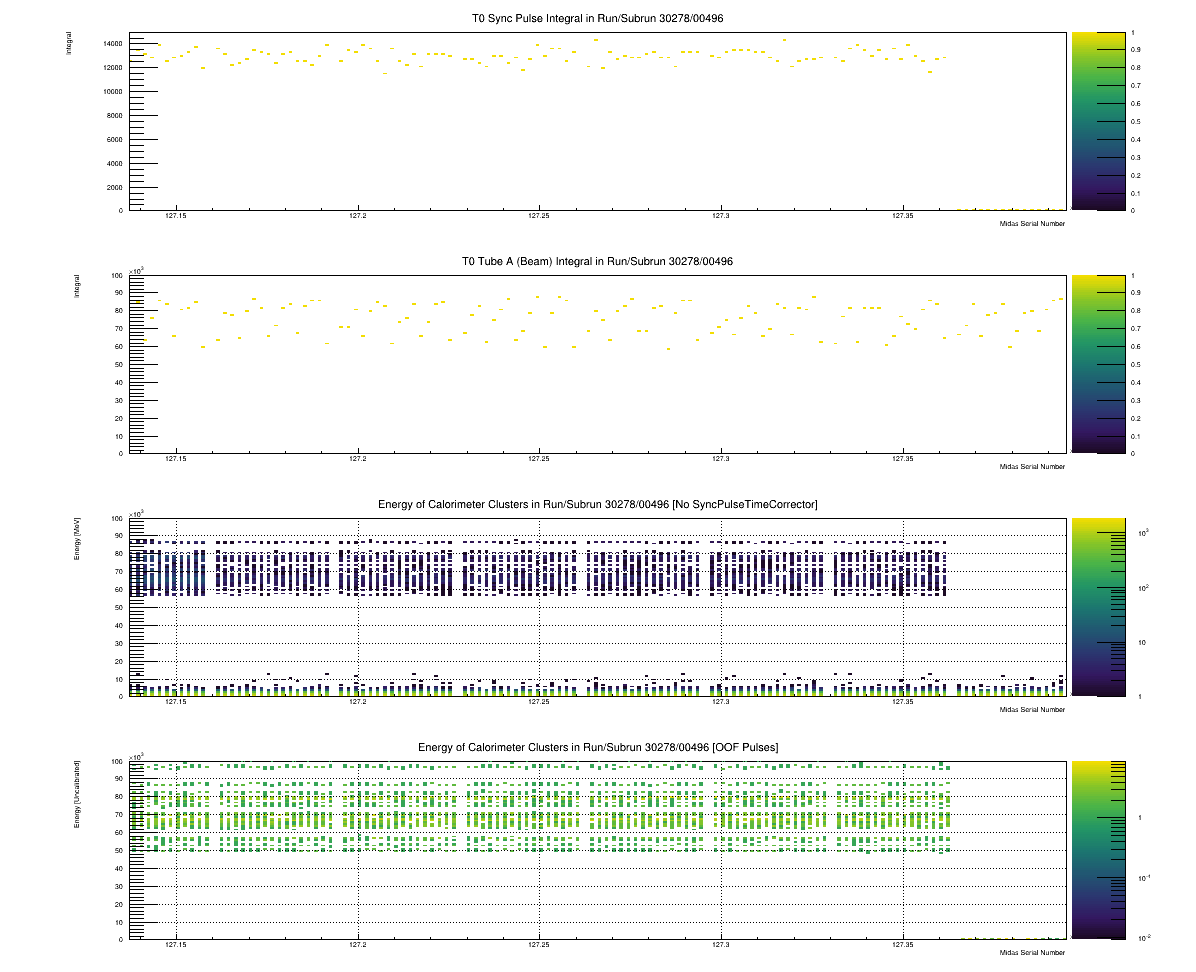

In [172]:
c = r.TCanvas("c","c",1200,1000)
c.Divide(1,4)

c.cd(1)
h = r.TH2D("h","T0 Sync Pulse Integral in Run/Subrun 30278/00496; Midas Serial Number; Integral",
           nBins,plotMin,plotMax,
           100,0,15000)
t4.Draw("syncPulseIntegraltubeA:midasSerialNum>>h","","colz")
h.DrawCopy("colz")

c.cd(2)
h = r.TH2D("h","T0 Tube A (Beam) Integral in Run/Subrun 30278/00496; Midas Serial Number; Integral",
           nBins,plotMin,plotMax,
           100,0,100000)
t4.Draw("integraltubeA:midasSerialNum>>h","","colz")
h.DrawCopy("colz")

c.cd(3)
h = r.TH2D("h","Energy of Calorimeter Clusters in Run/Subrun 30278/00496 [No SyncPulseTimeCorrector]; Midas Serial Number; Energy [MeV]",
           nBins,plotMin,plotMax,
           100,0,100000)
t4.Draw("energy:midasSerialNum>>h","","colz")
r.gPad.SetLogz()
h.DrawCopy("colz") 
r.gPad.SetGrid()

c.cd(4)
h2 = r.TH2D("h2","Energy of Calorimeter Clusters in Run/Subrun 30278/00496 [OOF Pulses]; Midas Serial Number; Energy [Uncalibrated]",
           nBins,plotMin,plotMax,
           100,0,100000)
t3.Draw("energy:midasSerialNum>>h2","","colz")
r.gPad.SetLogz()
h2.DrawCopy("colz") 
r.gPad.SetGrid()

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


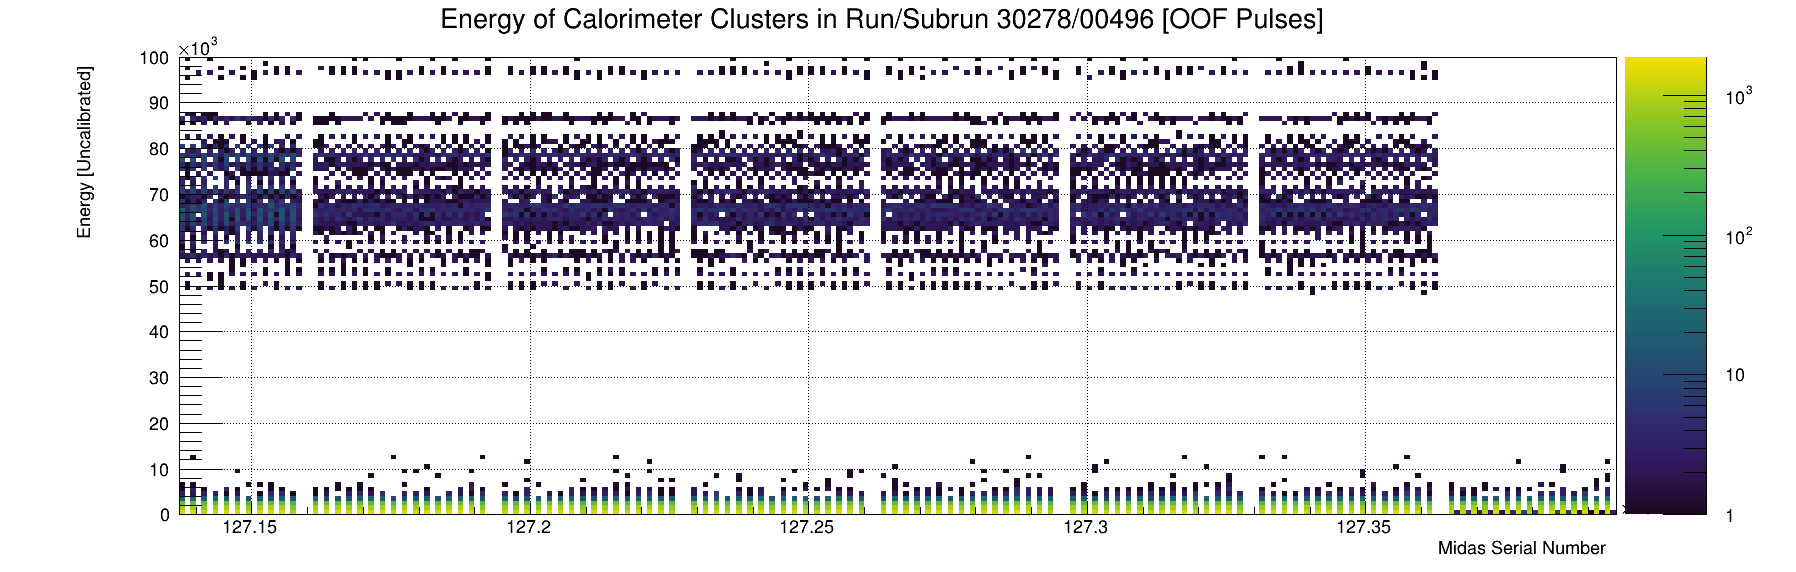

In [174]:
h3 = h2.Clone("h3")
h3.Add(h)

c = r.TCanvas("c","c",1800,600)
h3.Draw("colz")
c.SetGrid()
c.SetLogz()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


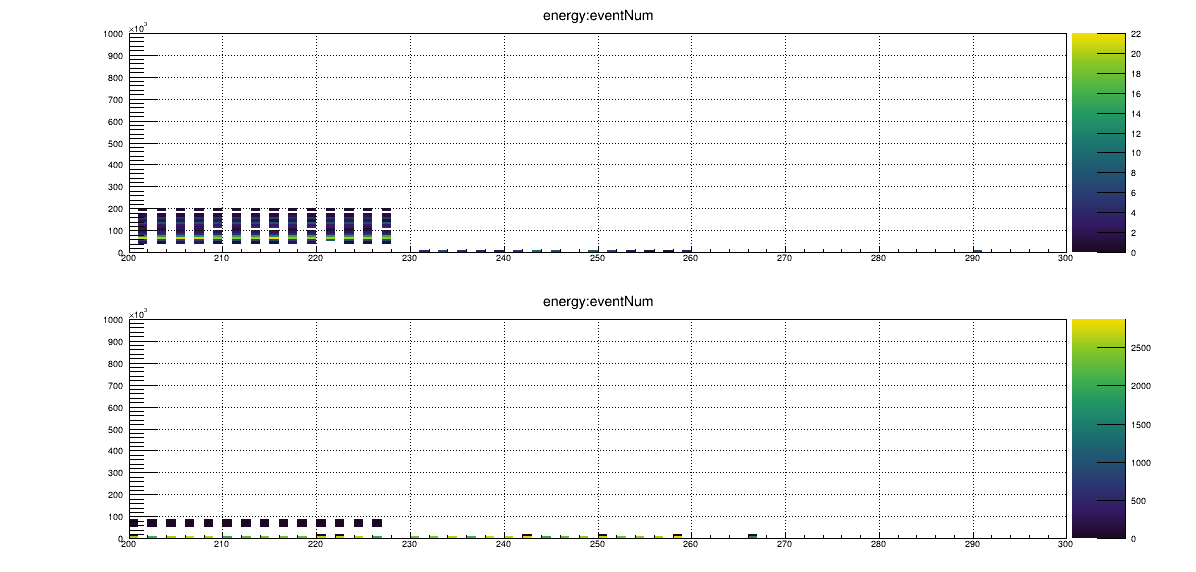

In [164]:
c = r.TCanvas("c","c",1200,600)

c.Divide(1,2)
c.cd(1)

t3.Draw("energy:eventNum>>hist(100,200,300,100,0,1000000)","","colz")
r.gPad.SetGrid()

c.cd(2)
t4.Draw("energy:eventNum>>hist2(100,200,300,100,0,1000000)",""," colz")

r.gPad.SetGrid()

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


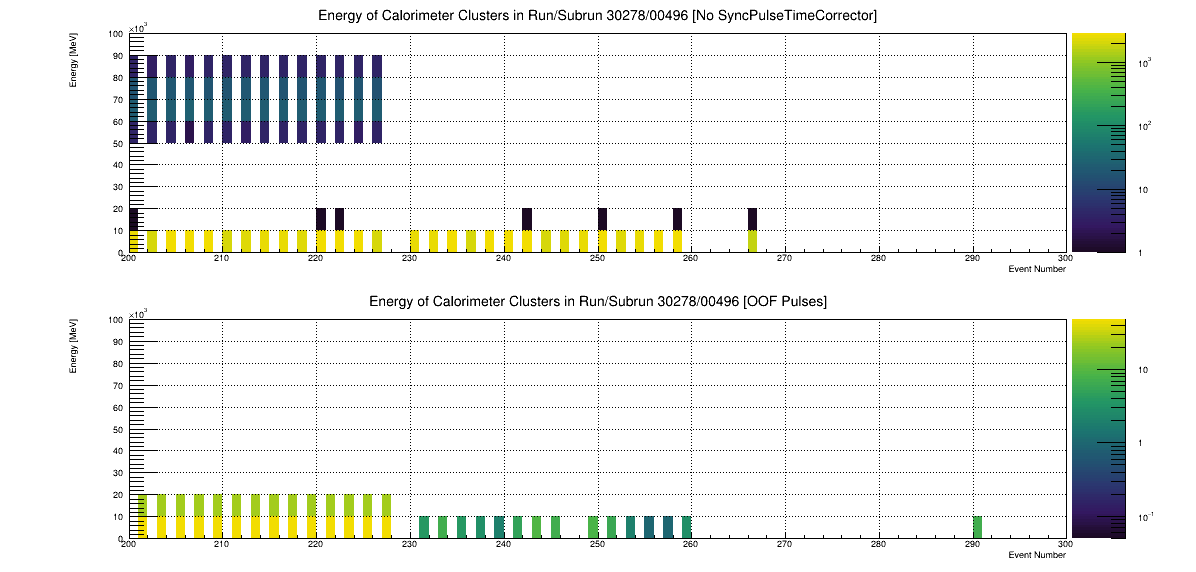

In [165]:
c = r.TCanvas("c","c",1200,600)

c.Divide(1,2)
c.cd(1)

nBins = 100
plotMin = 200
plotMax = 300

h = r.TH2D("h","Energy of Calorimeter Clusters in Run/Subrun 30278/00496 [No SyncPulseTimeCorrector]; Event Number; Energy [MeV]",
           nBins,plotMin,plotMax,
           10,0,100000)
t4.Draw("energy:eventNum>>h","","colz")
r.gPad.SetLogz()
h.DrawCopy("colz") 
r.gPad.SetGrid()


c.cd(2)
h2 = r.TH2D("h2","Energy of Calorimeter Clusters in Run/Subrun 30278/00496 [OOF Pulses]; Event Number; Energy [MeV]",
           nBins,plotMin,plotMax,
           10,0,100000)
t3.Draw("energy/10:eventNum>>h2","","colz")
r.gPad.SetLogz()
h2.DrawCopy("colz") 
r.gPad.SetGrid()


c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


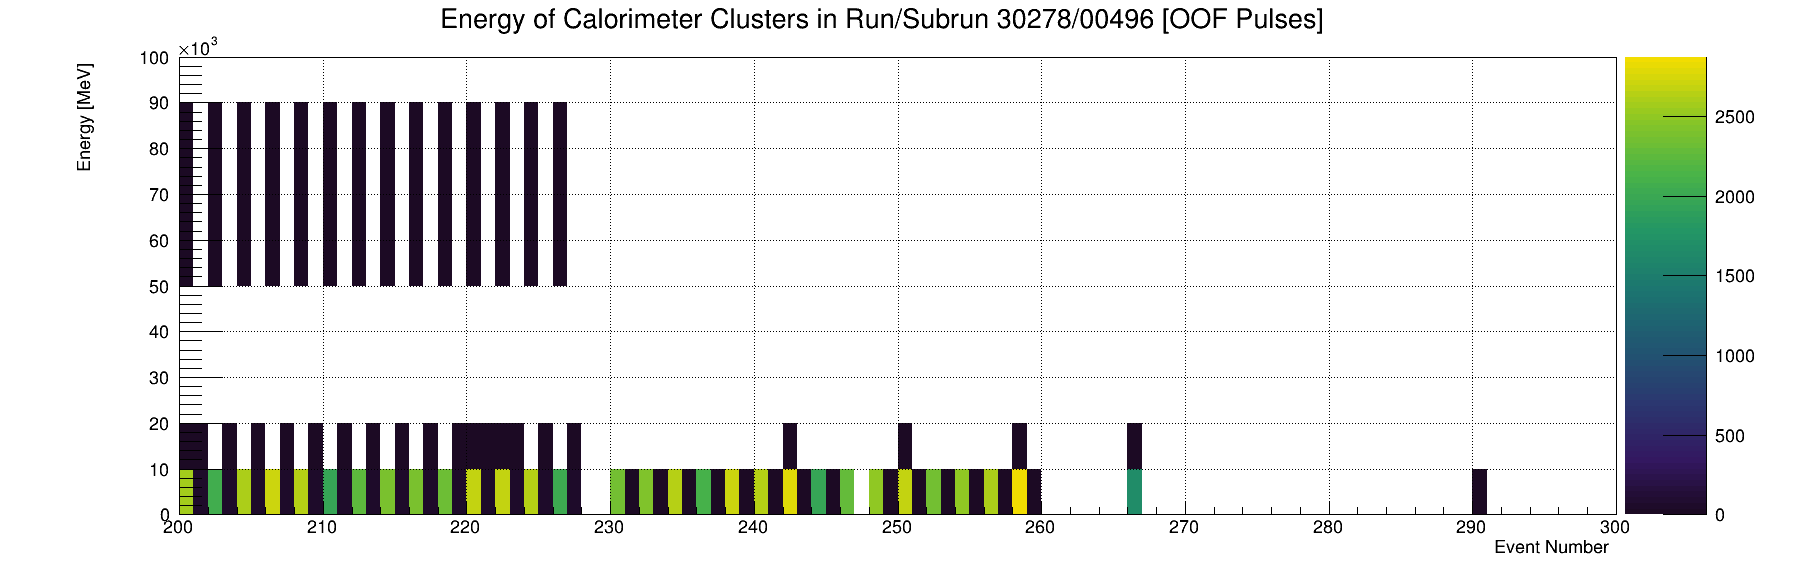

In [166]:
h3 = h2.Clone("h3")
h3.Add(h)

c = r.TCanvas("c","c",1800,600)
h3.Draw("colz")

c.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


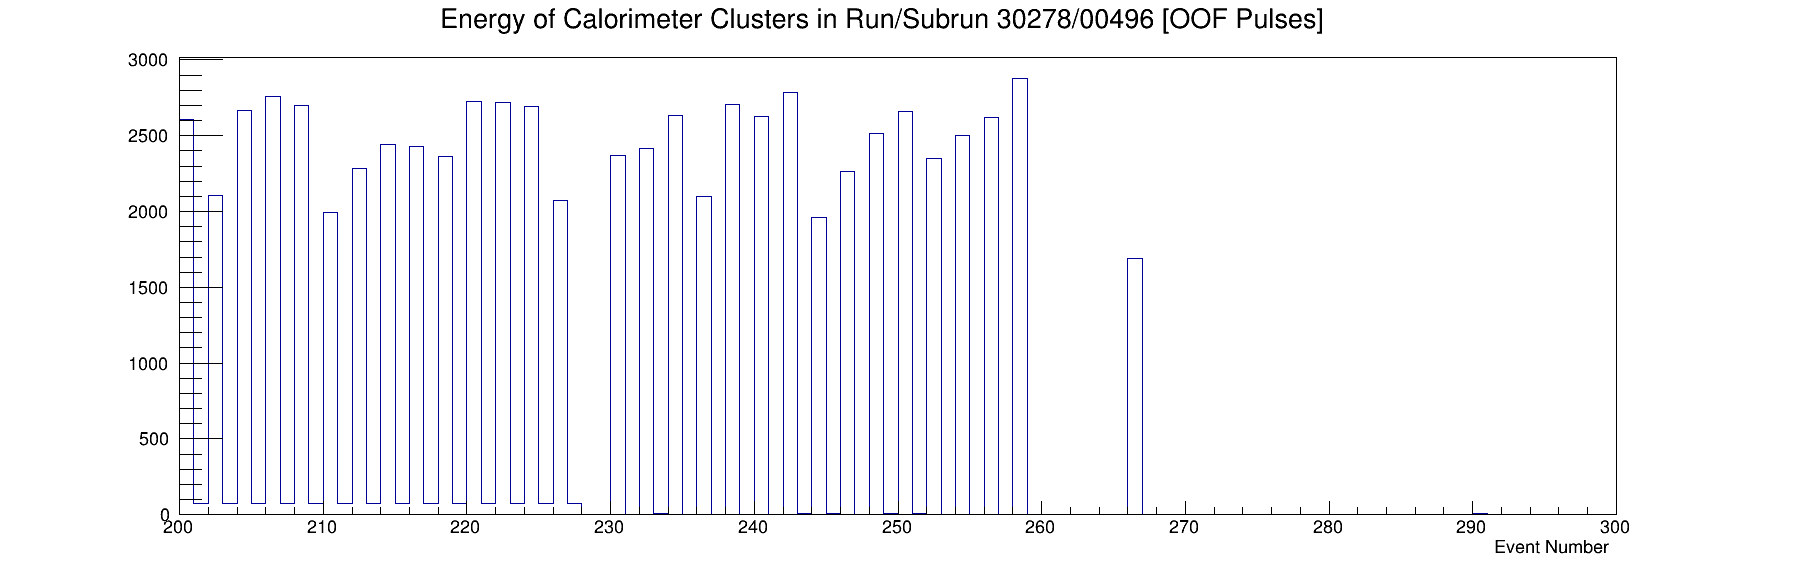

In [167]:
h3 = h2.Clone("h3")
h3.Add(h)

c = r.TCanvas("c","c",1800,600)
h3.ProjectionX().Draw("colz")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


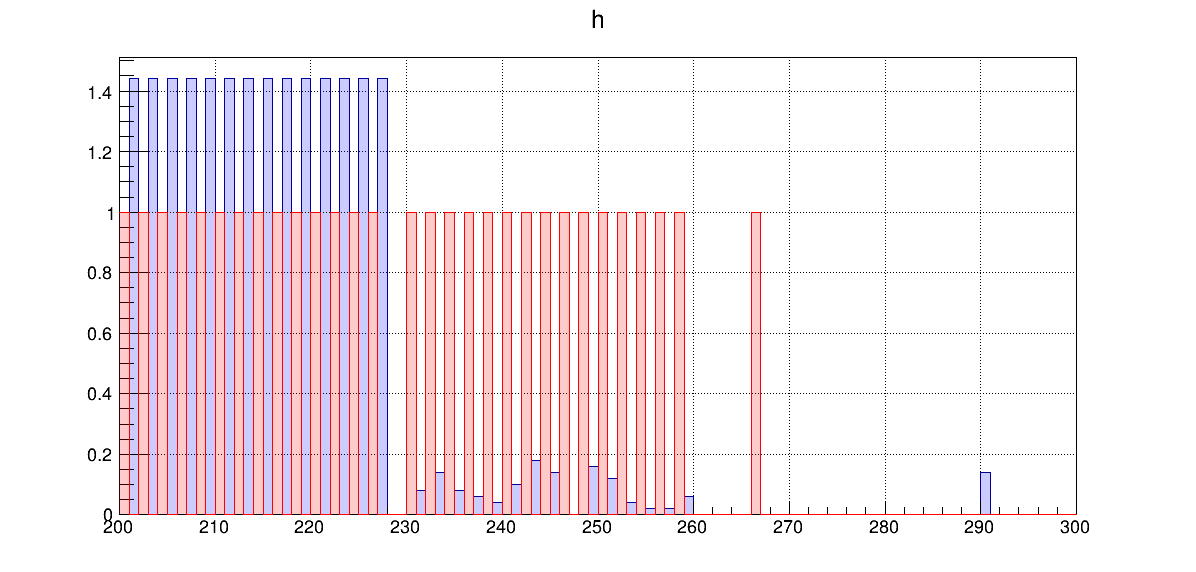

In [168]:
c = r.TCanvas("c","c",1200,600)

h = r.TH1D("h","h",100,200,300)
t3.Draw("eventNum/1>>h","","colz")
h.Scale(1/50)
h.SetFillColorAlpha(4,0.2)
h.Draw("hist")
r.gPad.SetGrid()

t0.SetLineColor(2)
t0.SetFillColorAlpha(2,0.2)
t0.Draw("eventNum>>hist(100,200,300)","","same")

r.gPad.SetGrid()
#c.SetLogy()

c.Draw()